# Working with data structures

## Junior mentor:

Y. Fabian Bautista


## Objectives of the tutorial

1. To create and manipulate data sets: Lists, arrays, dictionaries
2. To use Pandas package to manipulate data sets
3. To plot data structures using matplotlib
3. To use conditional statements
4. To fit data, and computing goodness of fit

### Loading packages

In [36]:
import pandas as pf # For data structure manipulations
import matplotlib.pyplot as plt # For ploting

# Arrays

A numpy array is similar to a list. It's usually fixed in size and each element is of the same type. We can cast a list to a numpy array by first importing numpy: 

In [37]:
import numpy as np # For array and mathematical manipulations

## 1D Arrays

 We  cast a list as follows:


In [29]:
# Create a numpy array

a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

Each element is of the same type, in this case integers: 


 As with lists, we can access each element via a square bracket:


In [35]:
# Print each element

print("a[0]:", a[0])
print("a[1]:", a[1])
print("a[2]:", a[2])
print("a[3]:", a[3])
print("a[4]:", a[4])

a[0]: 0
a[1]: 1
a[2]: 2
a[3]: 3
a[4]: 4


If we check the type of the array we get <b>numpy.ndarray</b>:


In [37]:
# Check the type of the array

type(a)

numpy.ndarray

As numpy arrays contain data of the same type, we can use the attribute "dtype" to obtain the Data-type of the array’s elements. In this case a 64-bit integer: 

In [38]:
# Check the type of the values stored in numpy array

a.dtype

dtype('int64')

We can create a numpy array with real numbers:


In [39]:
# Create a numpy array

b = np.array([3.1, 11.02, 6.2, 213.2, 5.2])

In [40]:
# Check the type of array

type(b)

numpy.ndarray

In [41]:
# Check the value type

b.dtype

dtype('float64')

### Slicing

Like lists, we can slice the numpy array, and we can select the elements from 1 to 3 and assign it to a new numpy array <code>d</code> as follows:

In [45]:
# Create numpy array

c = np.array([20, 1, 2, 3, 4])

# Slicing the numpy array

d = c[1:4]
d

array([1, 2, 3])

### Assign Value with List


Similarly, we can use a list to select a specific index.
The list ' select ' contains several values:

In [48]:
# Create the index list

select = [0, 2, 3]

We can use the list as an argument in the brackets. The output is the elements corresponding to the particular index:

In [49]:
# Use List to select elements

d = c[select]
d

array([20,  2,  3])

### Other Attributes

Let's review some basic array attributes using the array <code>a</code>:

In [51]:
# Create a numpy array

e = np.array([0, 1, 2, 3, 4])
e

array([0, 1, 2, 3, 4])

The attribute <code>size</code> is the number of elements in the array:

In [52]:
# Get the size of numpy array

e.size

5

The next two attributes will make more sense when we get to higher dimensions but let's review them. The attribute <code>ndim</code> represents the number of array dimensions or the rank of the array, in this case, one:

In [53]:
# Get the number of dimensions of numpy array

e.ndim

1

The attribute <code>shape</code> is a tuple of integers indicating the size of the array in each dimension:

In [54]:
# Get the shape/size of numpy array

a.shape

(5,)

### Mean of a 1D numpy array

In [56]:
# Get the mean of numpy array

mean = e.mean()
mean

2.0

### Get the standard deviation of 1D numpy array


In [58]:
# Get the standard deviation of numpy array

standard_deviation = e.std()
standard_deviation

1.4142135623730951

### Maximal and minimal values in a 1D array

In [59]:
# Get the biggest value in the numpy array

max_e = e.max()
max_e

4

In [60]:
# Get the smallest value in the numpy array

min_e = e.min()
min_e

0

# (2 +... )D numpy arrays

## Numpy Array Operations

# Dictionaries

# The Pandas library

#  h5py Data sets 

### For more information see  <a href="https://docs.h5py.org/en/stable/quick.html"> h5py </a>

An HDF5 file is a container for two kinds of objects: <code> datasets </code>, which are array-like collections of data, and <code> groups, </code> which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

### Groups work like dictionaries, and datasets work like NumPy arrays


In this part of the tutorial we will explore several features when working with h5py datasets. We will show that by working with an especific example:

## Example of h5py Data sets 

The Auriga simulations  provided us with the  data file <code>  'halo_1_DMO.hdf5' </code> which contains   a set of  dark matter particles placed between 4-15 kpc in a dark matter-only halo. In the data set,  we have acces to  the particle <code> 'Coordinates' (x, y, z in kpc) </code> , the particles  <code> 'Mass' (in Solar masses) </code>, and  <code> 'Velocities' (vx, vy, vz in km/s) </code> .

In [1]:
import h5py 

### Loading data sets

In [4]:
file_path = 'halo_1_DMO.hdf5'

In [107]:
halo1 = h5py.File(file_path, 'r') #'r' atribute to read only

In [108]:
# with h5py.File(file_path,'r') as halo_1:
    
#     data_halo_1 = halo_1['DarkMatter']
    
#     print(data_halo_1.keys())
    


As in a dictionary, we can as for the set of keys contained in the file

In [109]:
halo1.keys()

<KeysViewHDF5 ['DarkMatter']>

Let us create a new data set, which contains all the information contained in the group <code> 'DarkMatter' </code>

In [114]:
data_set = halo1['DarkMatter']
data_set

<HDF5 group "/DarkMatter" (3 members)>

As we have mentioned, groups contain both data sets, or other subgroups. To see what data sets  and subgoups are inlcuded, we use the <code> keys() </code> atribute of the group (recall groups work as normal dictionaries)

In [111]:
data_set.keys()

<KeysViewHDF5 ['Coordinates', 'Mass', 'Velocities']>

Let us create a dataset wich contains only the coordinates of the DM particles

In [113]:
particle_codts = data_set['Coordinates']
particle_codts

<HDF5 dataset "Coordinates": shape (244986, 3), type "<f4">

 We can for instance create  1-D arrays that contains the particles x, y or z coordinates only. Since there are <code> 244986 </code> particles, we choose to work with a subset of them, for instance the first <code> 1000 </code> particles

In [124]:
x_c = np.array([particle_codts[i][0] for i in range(3000)])
y_c = np.array([particle_codts[i][1] for i in range(3000)])

In [117]:
x_c

array([-3.6035447 , -3.6181986 , -2.9064834 , -3.7221205 ,  3.5660794 ,
       -3.3184376 ,  3.2704368 , -2.8666186 , -2.9335723 , -3.1876636 ,
       -3.681396  , -3.0215397 , -3.7727125 , -3.5729125 , -3.437352  ,
        3.051537  , -2.8294919 , -3.8926692 , -3.163867  ,  3.1020505 ,
        3.2114055 , -3.8658836 , -2.879835  ,  3.601894  , -3.8248649 ,
       -3.81329   ,  3.8143537 , -3.1973271 , -3.1454802 , -3.4333587 ,
       -2.61522   ,  3.1397316 ,  2.6077995 , -3.1550632 ,  3.7688873 ,
       -3.4711745 , -2.8862395 , -3.3892753 , -4.004568  , -4.1173153 ,
       -3.2629924 ,  3.5082586 , -2.7006865 , -3.8895688 , -4.1427765 ,
       -4.142438  , -3.9352243 ,  3.5087988 , -3.423174  , -2.6807148 ,
       -3.7732217 , -3.8201115 , -3.3577814 , -3.7508273 , -2.6234698 ,
       -4.052296  , -4.0194163 , -3.6220787 ,  2.2177284 , -3.3929846 ,
       -2.237134  , -3.9474797 , -3.1901648 , -4.082782  , -4.022199  ,
       -3.8190951 , -3.702443  , -4.1261635 ,  3.6005342 , -3.67

It is convenient to visualize data in plots. For instance, we can create ask for the positions on the <code> x-y </code> plane. 

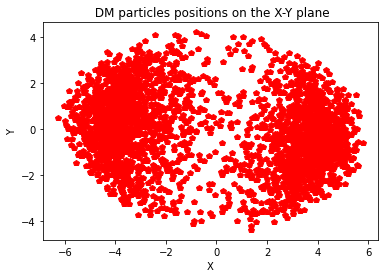

In [125]:
plt.plot(x_c,y_c, 'rp') #change 'cf' = color shape, for instance bs = blue squares, ro=red balls
plt.xlabel('X')
plt.ylabel('Y')
plt.title(' DM particles positions on the X-Y plane')
plt.show()

# Excercise

Plot X-Z, and Y-Z For  the last 800 particles

In [53]:
halo1['DarkMatter']['Coordinates'][100]

array([ 3.8252275 , -0.28497767, -1.9458717 ], dtype=float32)

In [60]:
halo1['DarkMatter']['Mass']

<HDF5 dataset "Mass": shape (2,), type "<f8">

In [59]:
halo1['DarkMatter']['Mass'][1]

353725.33898061706

In [61]:
halo1['DarkMatter']['Velocities']

<HDF5 dataset "Velocities": shape (244986, 3), type "<f4">